In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

# Mounting the Google Drive for access to input and output folders
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#     /content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/1000GPT_image_metrics_output.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Image_Name                 1016 non-null   object 
 1   SSIM                       1015 non-null   float64
 2   PixelMatch_DiffPercentage  1015 non-null   float64
 3   CLIP                       1015 non-null   float64
 4   HTML_Valid                 1016 non-null   object 
 5   Semantic_Precision         1015 non-null   float64
 6   Semantic_Recall            1015 non-null   float64
 7   PixelMatch_Normalized      1015 non-null   float64
dtypes: float64(6), object(2)
memory usage: 63.6+ KB
None
              SSIM  PixelMatch_DiffPercentage         CLIP  \
count  1015.000000                1015.000000  1015.000000   
mean      0.703179                  27.300848     0.699552   
std       0.127962                  19.912660     0.106467   
min       0.076783          

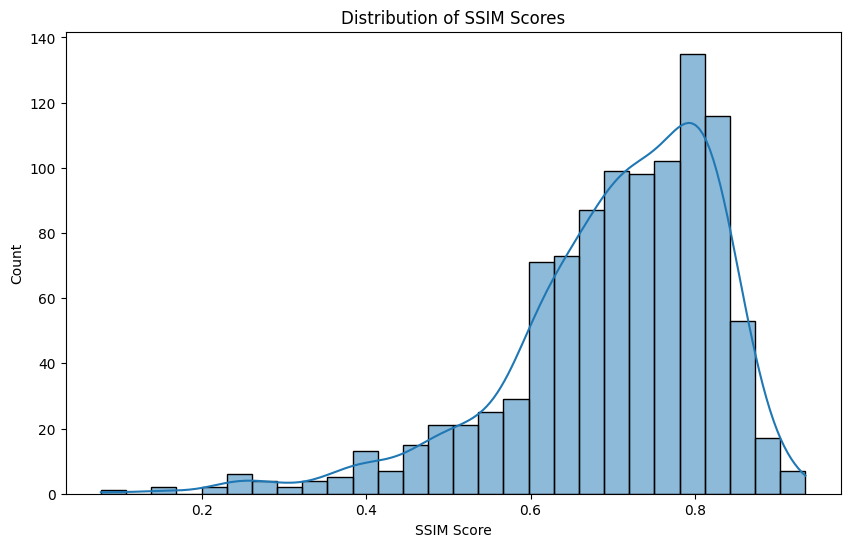

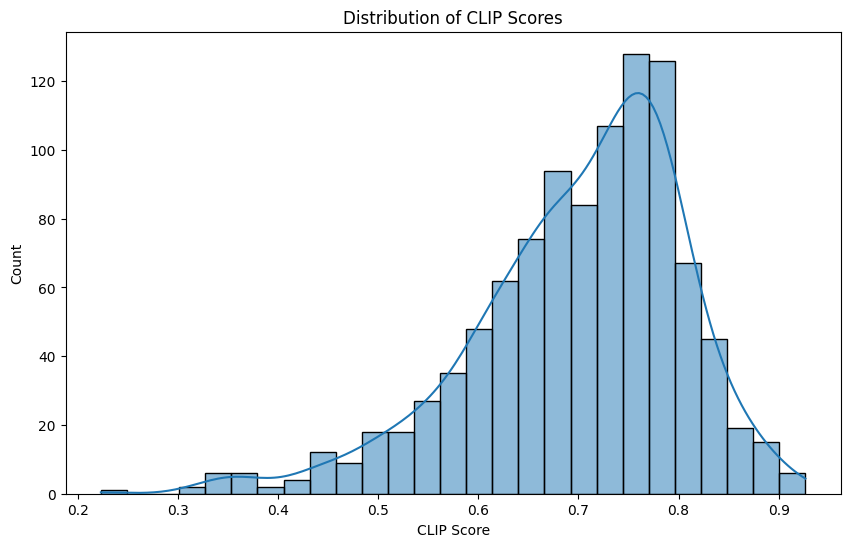

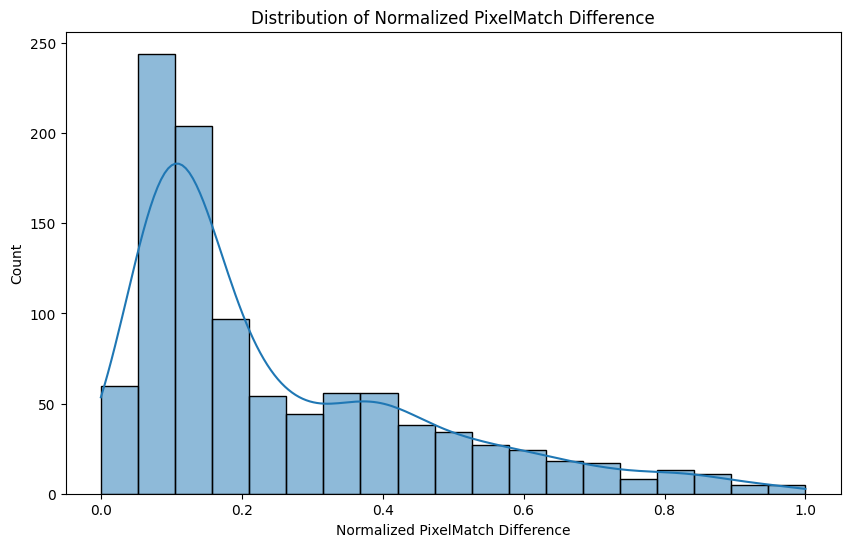

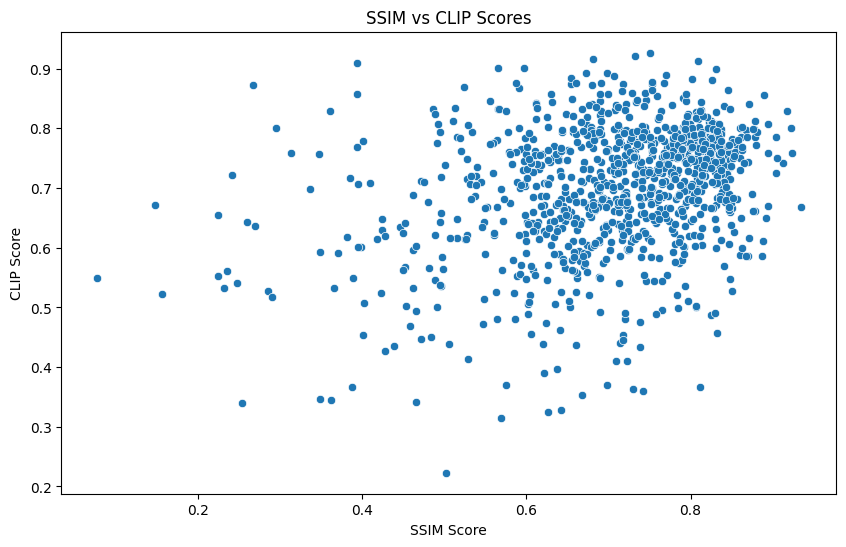

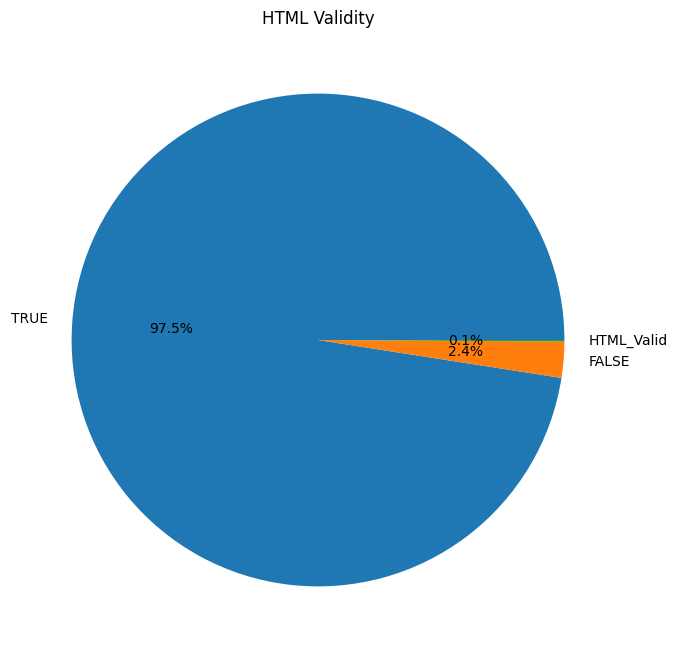

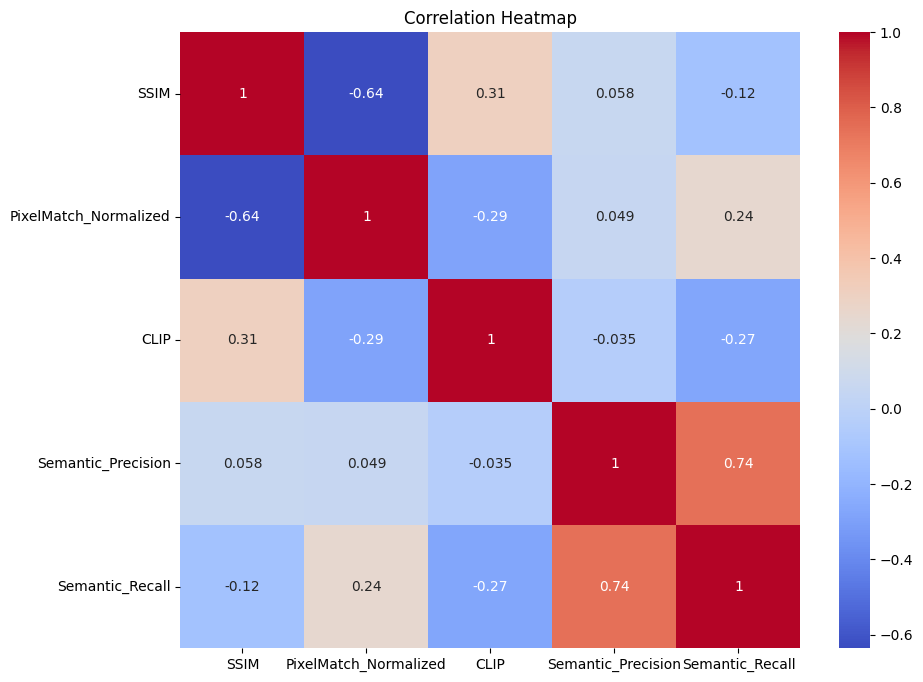

Average SSIM Score: 0.7032
Average CLIP Score: 0.6996
Average Normalized PixelMatch Difference: 0.2525
Percentage of Valid HTML: 97.54%
Average Semantic Precision: 0.0761
Average Semantic Recall: 0.5008

Top 30 websites by SSIM Score:
                               Image_Name      SSIM
22   A930FCEC-FF8B-4277-B1B4-96BF682C0713  0.934580
25   9A66761C-222D-4CAF-883D-34F851A26E11  0.923904
59   5F2F2DEB-1E17-4EC7-AD0F-1EE88F2C79CD  0.922683
108  5F022D9E-CB19-492C-AD85-189A622FD299  0.917327
34   E5D53F97-D3A2-4BB7-8107-6FB035F94722  0.912420
853                   football-espana.net  0.905595
79   C74A6307-7A8E-429B-9513-2E1123B04F70  0.904339
704                            sketch_129  0.903837
964                             sketch_14  0.894892
72   8BB40A0D-A390-45B6-AAE3-0A104D06F8C0  0.894514
119  4D588082-35DC-4E8C-B061-350E26DF6607  0.894188
781                 expertworldtravel.com  0.891383
6    C6A6992D-B827-4BD4-AFA8-C41A10B58F39  0.888885
10   9FED117B-BEB3-4DED-876F-9280B776

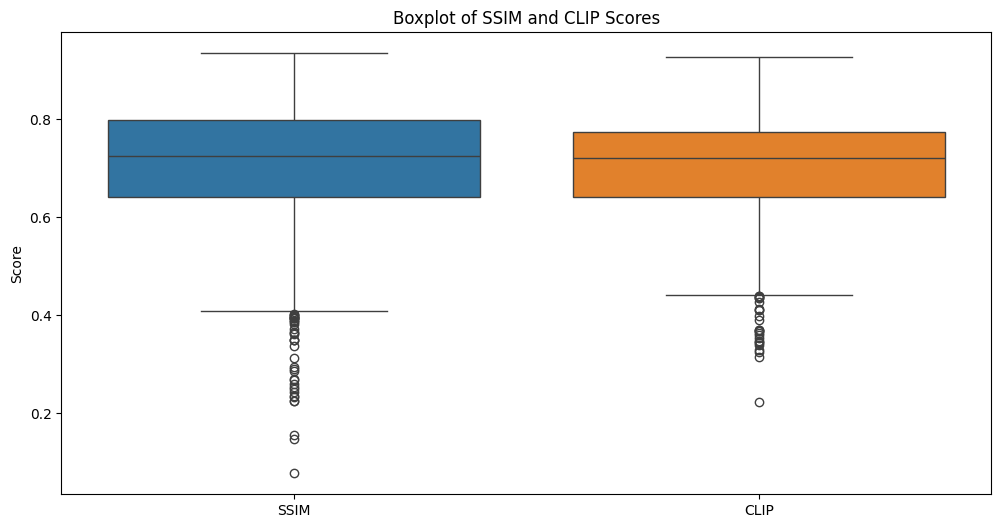

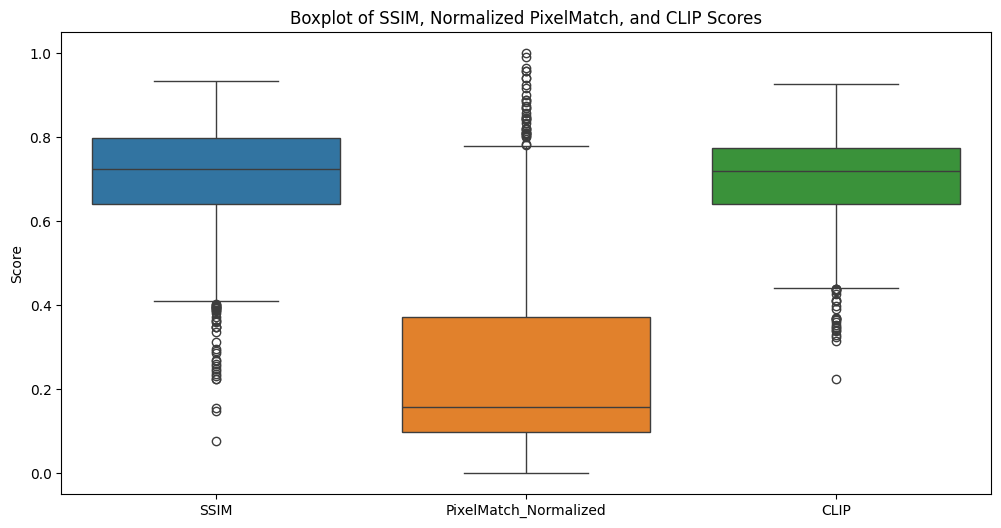

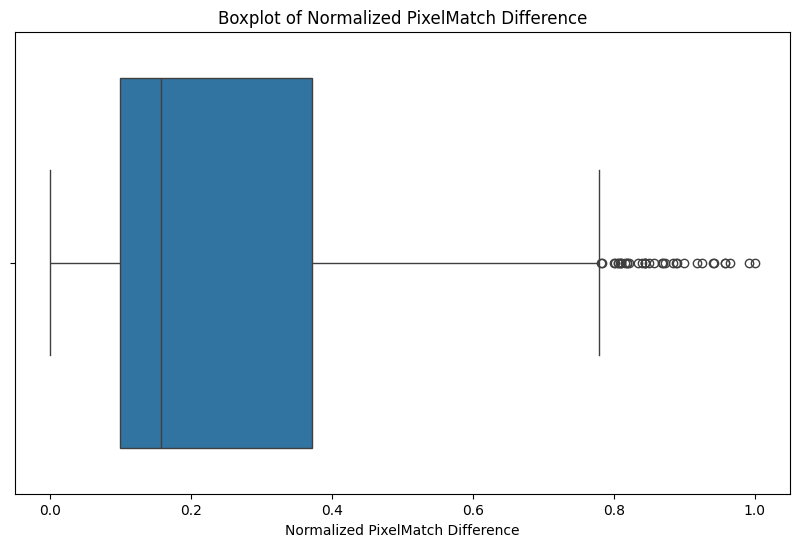

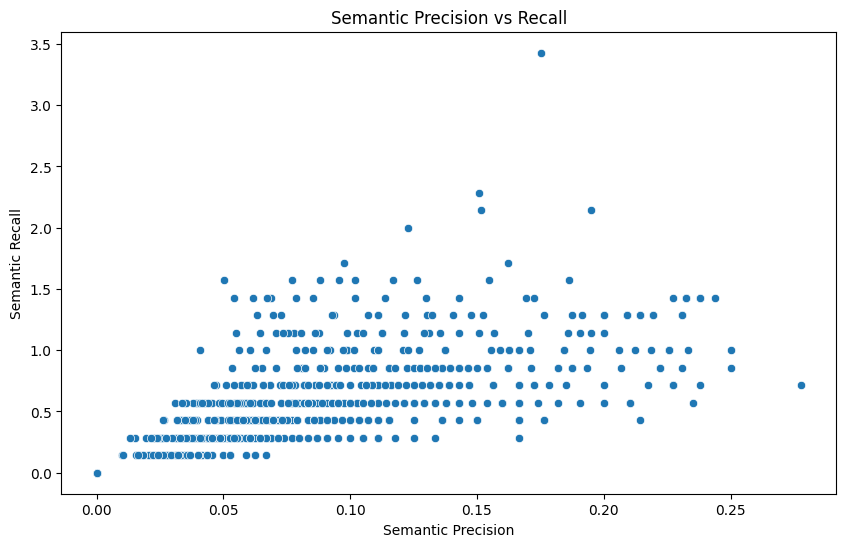

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.preprocessing import MinMaxScaler

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/Claude-3.5-Sonnet_image_metrics_output.csv', skiprows=1, header=None)

# Assigning column names
data.columns = ['Image_Name', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall']

# Converting columns to appropriate data types
numeric_columns = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Using function to categorise the given input into its respective datasets(Pix2Code, WebUI2Code, Bootstrap Synethetic, Sketch Wireframes)
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LoadUsing function to categorise the given input into its respective datasets(Pix2Code, WebUI2Code, Bootstrap Synethetic, Sketch Wireframes) the data
# data = pd.read_csv('web_metrics.csv')
# Normalising the PixelMatch_DiffPercentage to 0-1 scale
scaler = MinMaxScaler()
data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Basic data exploration
print(data.info())
print(data.describe())

# Showing Distribution of SSIM scores
plt.figure(figsize=(10, 6))
sns.histplot(data['SSIM'], kde=True)
plt.title('Distribution of SSIM Scores')
plt.xlabel('SSIM Score')
plt.ylabel('Count')
plt.show()

# Distribution of CLIP scores
plt.figure(figsize=(10, 6))
sns.histplot(data['CLIP'], kde=True)
plt.title('Distribution of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Count')
plt.show()

# Distribution of Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.histplot(data['PixelMatch_Normalized'], kde=True)
plt.title('Distribution of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.ylabel('Count')
plt.show()

# Scatter plot of SSIM vs CLIP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSIM', y='CLIP', data=data)
plt.title('SSIM vs CLIP Scores')
plt.xlabel('SSIM Score')
plt.ylabel('CLIP Score')
plt.show()

# HTML Validity pie chart
html_valid_counts = data['HTML_Valid'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(html_valid_counts, labels=html_valid_counts.index, autopct='%1.1f%%')
plt.title('HTML Validity')
plt.show()

# Correlation heatmap
correlation_matrix = data[['SSIM', 'PixelMatch_Normalized', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Calculate and print some statistics
print(f"Average SSIM Score: {data['SSIM'].mean():.4f}")
print(f"Average CLIP Score: {data['CLIP'].mean():.4f}")
print(f"Average Normalized PixelMatch Difference: {data['PixelMatch_Normalized'].mean():.4f}")
print(f"Percentage of Valid HTML: {(data['HTML_Valid'] == 'TRUE').mean() * 100:.2f}%")
print(f"Average Semantic Precision: {data['Semantic_Precision'].mean():.4f}")
print(f"Average Semantic Recall: {data['Semantic_Recall'].mean():.4f}")

# Identifing top performing websites
top_ssim = data.nlargest(30, 'SSIM')
top_clip = data.nlargest(30, 'CLIP')
top_pixel_match = data.nsmallest(30, 'PixelMatch_Normalized')

print("\nTop 30 websites by SSIM Score:")
print(top_ssim[['Image_Name', 'SSIM']])

print("\nTop 30 websites by CLIP Score:")
print(top_clip[['Image_Name', 'CLIP']])

print("\nTop 30 websites with least Normalized PixelMatch Difference:")
print(top_pixel_match[['Image_Name', 'PixelMatch_Normalized']])

# Combining Boxplot for SSIM and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'CLIP']])
plt.title('Boxplot of SSIM and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Combining Boxplot for SSIM, Normalized PixelMatch, and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'PixelMatch_Normalized', 'CLIP']])
plt.title('Boxplot of SSIM, Normalized PixelMatch, and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Boxplot for Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['PixelMatch_Normalized'])
plt.title('Boxplot of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.show()

# Scatter plot of Semantic Precision vs Recall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Semantic_Precision', y='Semantic_Recall', data=data)
plt.title('Semantic Precision vs Recall')
plt.xlabel('Semantic Precision')
plt.ylabel('Semantic Recall')
plt.show()

One-way ANOVA Results:

SSIM:
F-value: nan
p-value: nan

CLIP:
F-value: nan
p-value: nan

PixelMatch_Normalized:
F-value: nan
p-value: nan

Semantic_Precision:
F-value: nan
p-value: nan

Semantic_Recall:
F-value: nan
p-value: nan


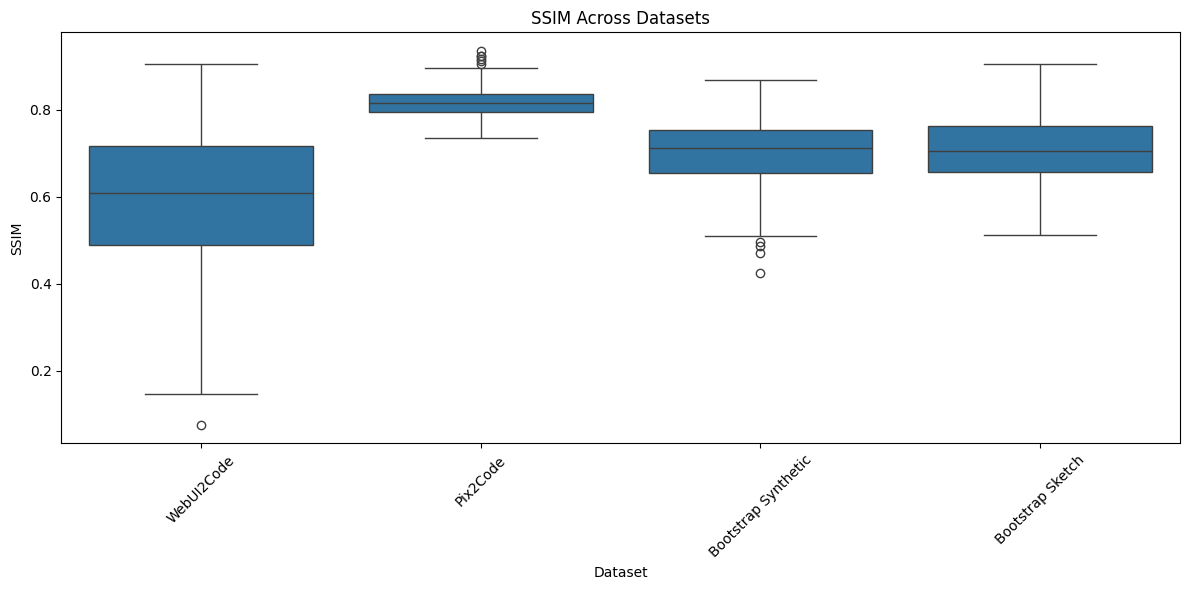

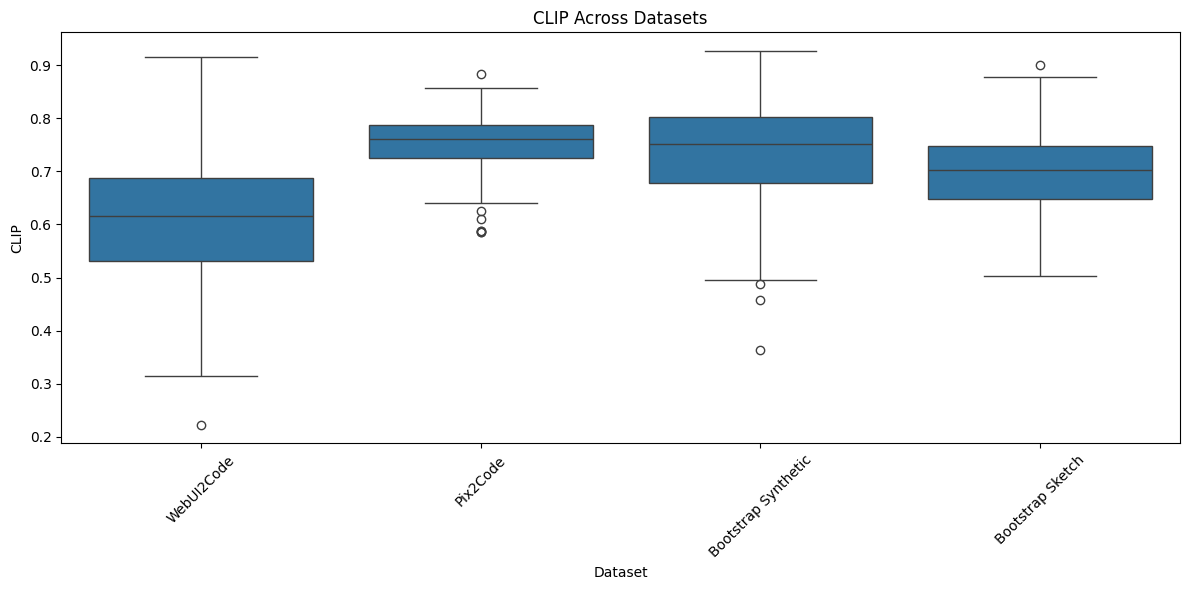

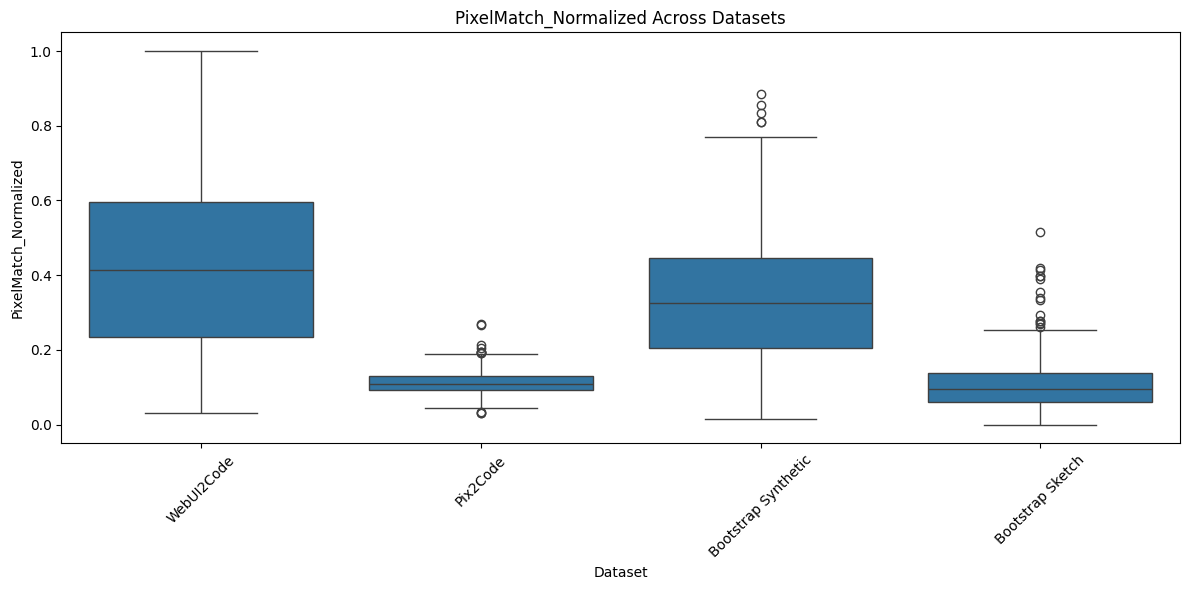

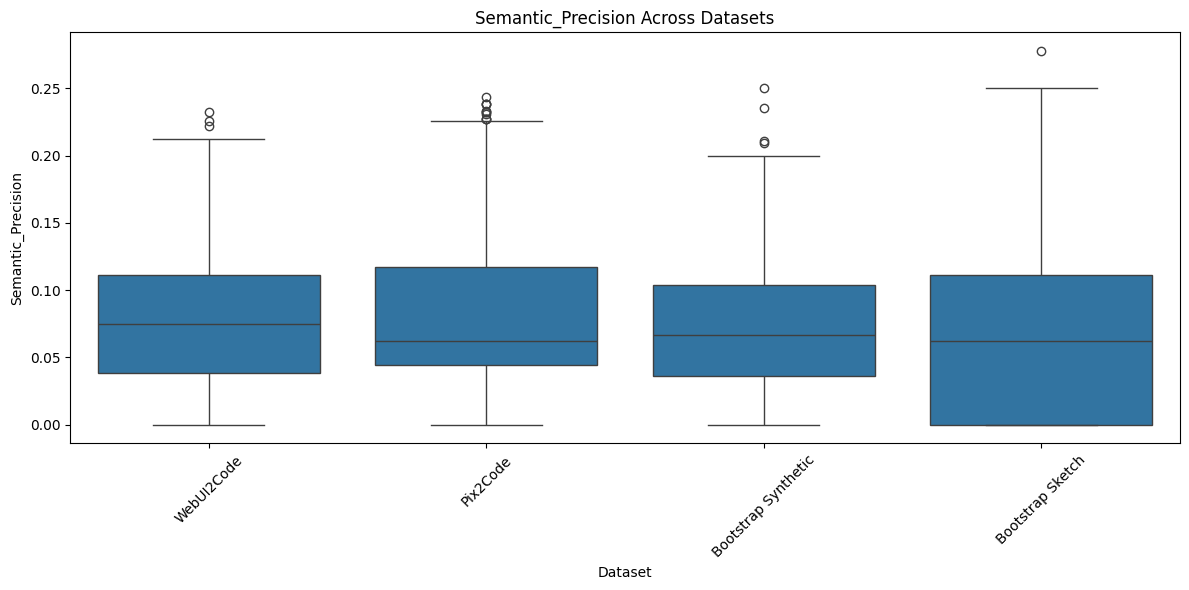

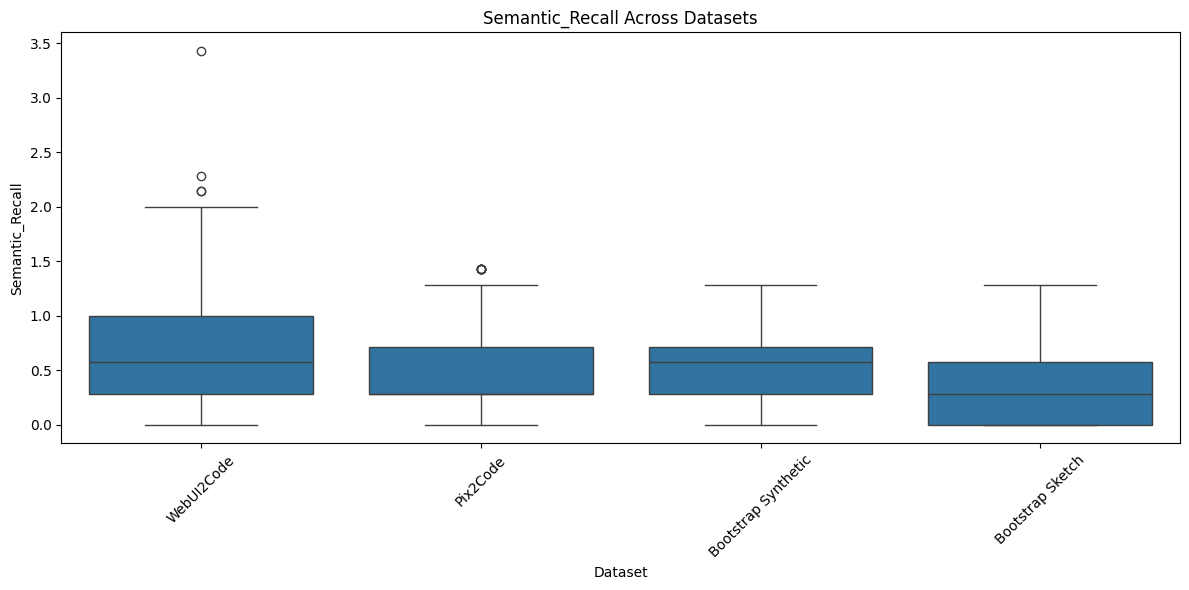

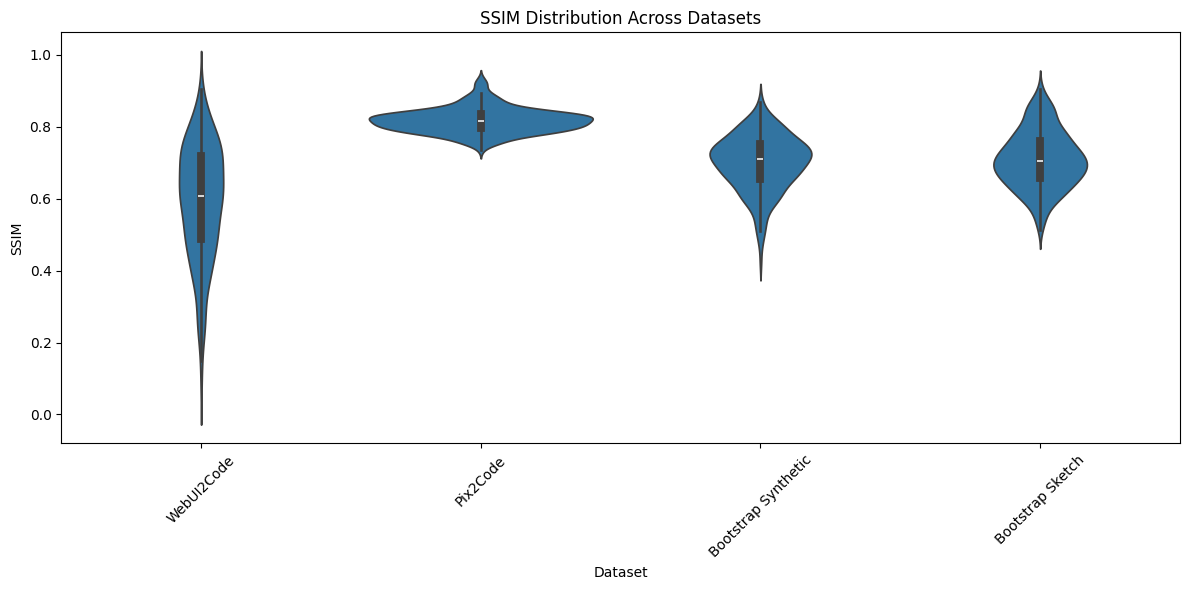

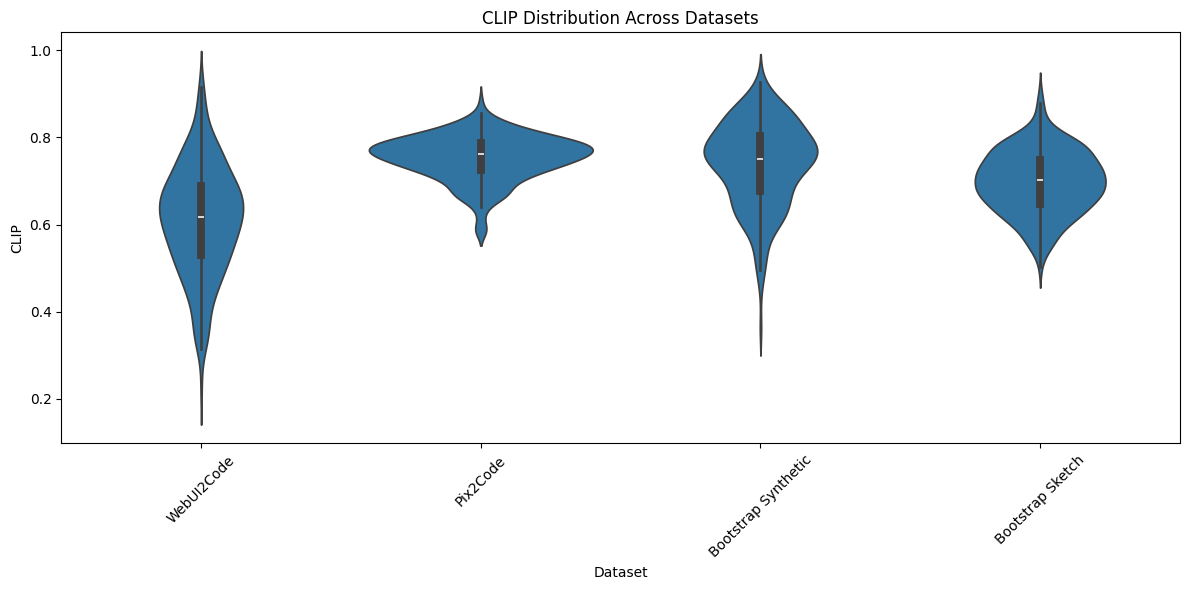

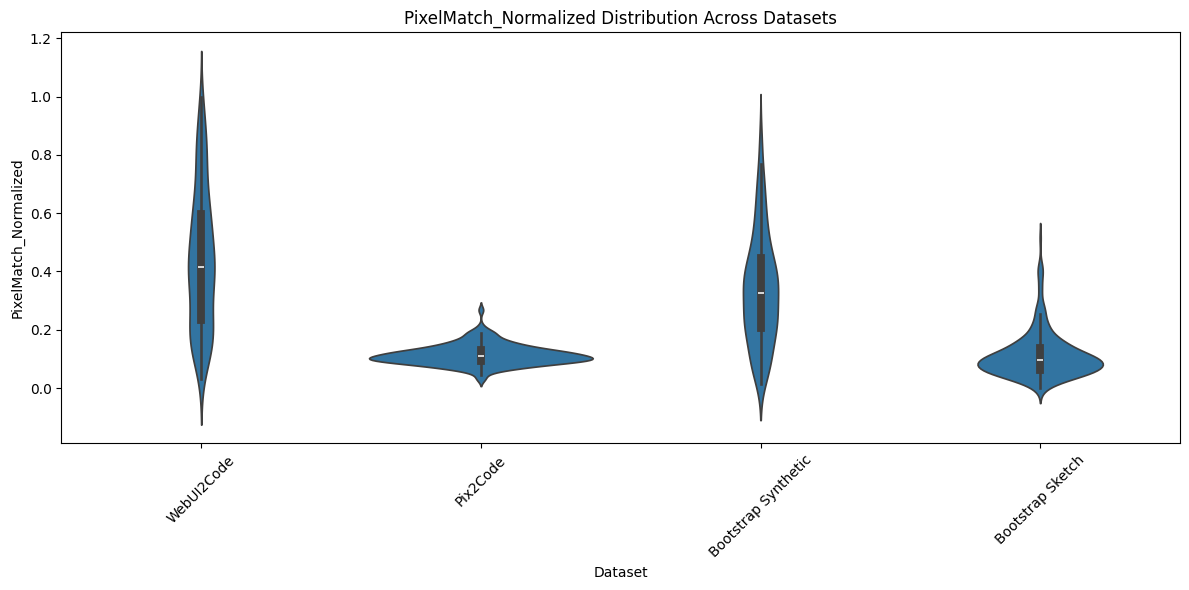

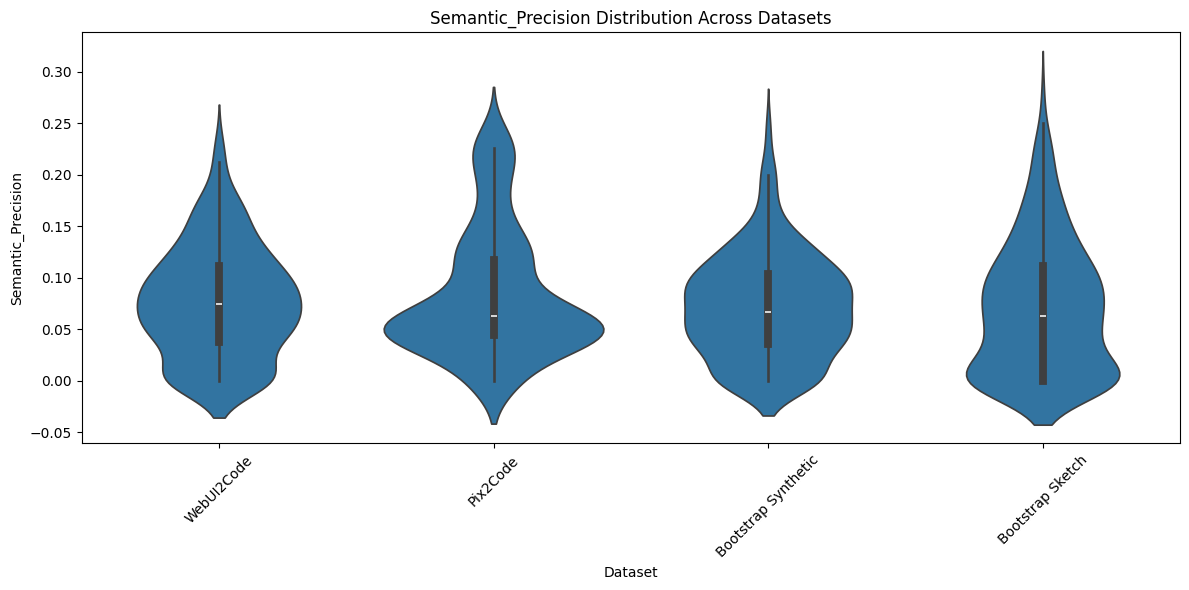

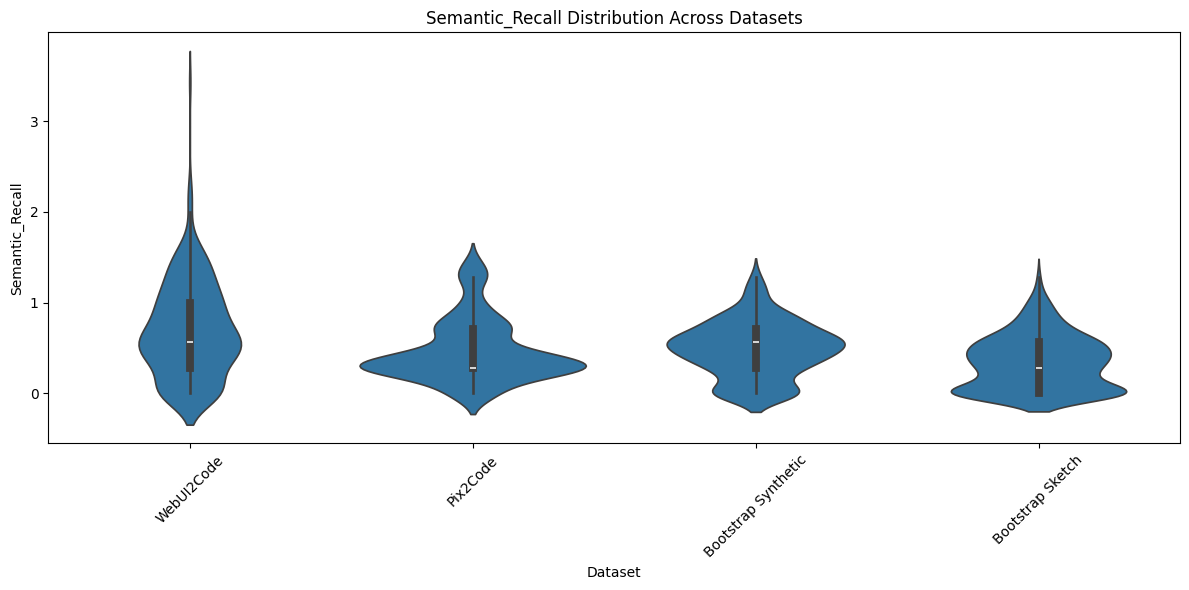


Mean Values for Each Metric Across Datasets:
                         SSIM      CLIP  PixelMatch_Normalized  \
Dataset                                                          
Bootstrap Sketch     0.708813  0.697821               0.112934   
Bootstrap Synthetic  0.699914  0.739219               0.337489   
Pix2Code             0.818048  0.753634               0.114483   
WebUI2Code           0.590342  0.611105               0.440352   

                     Semantic_Precision  Semantic_Recall  
Dataset                                                   
Bootstrap Sketch               0.070799         0.341176  
Bootstrap Synthetic            0.072368         0.491429  
Pix2Code                       0.084210         0.469143  
WebUI2Code                     0.077010         0.696703  


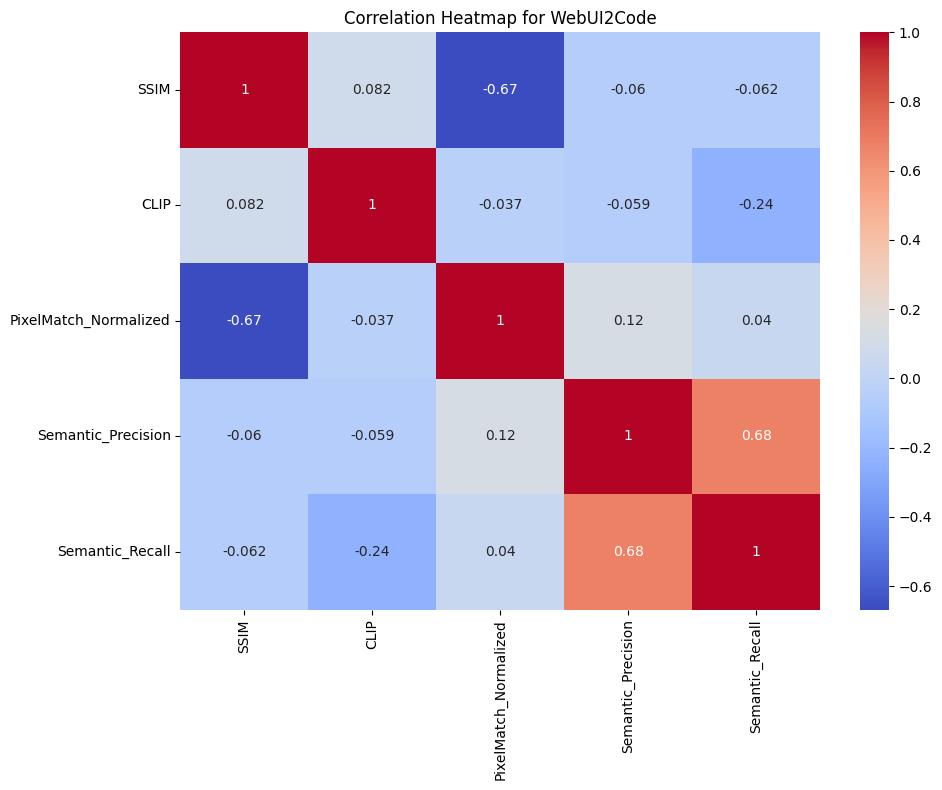

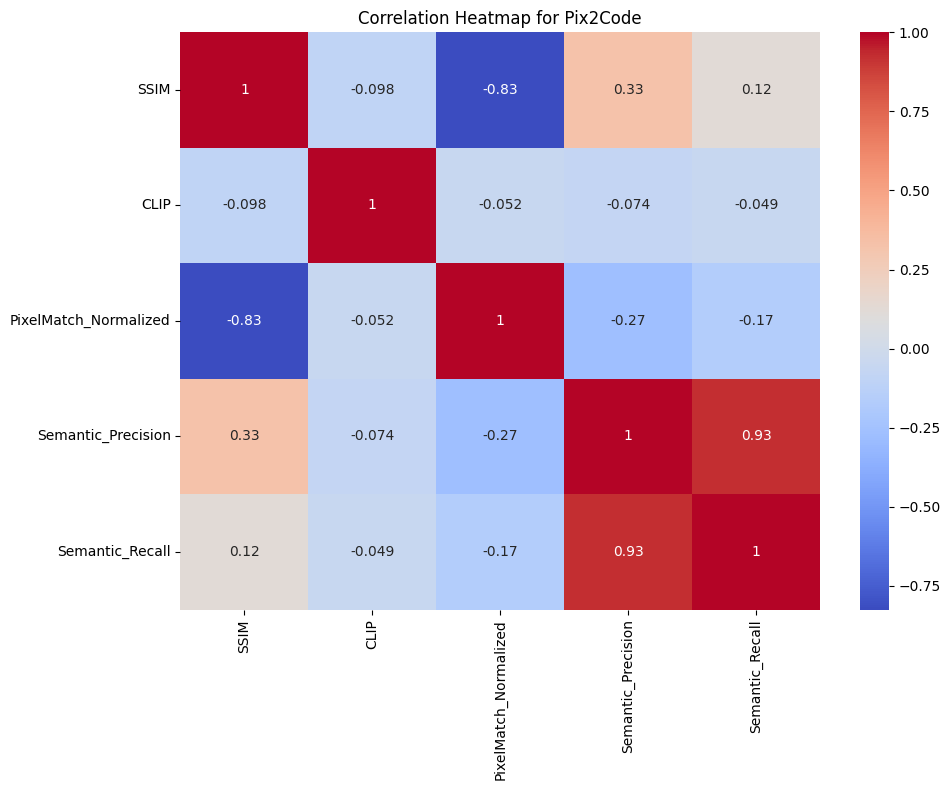

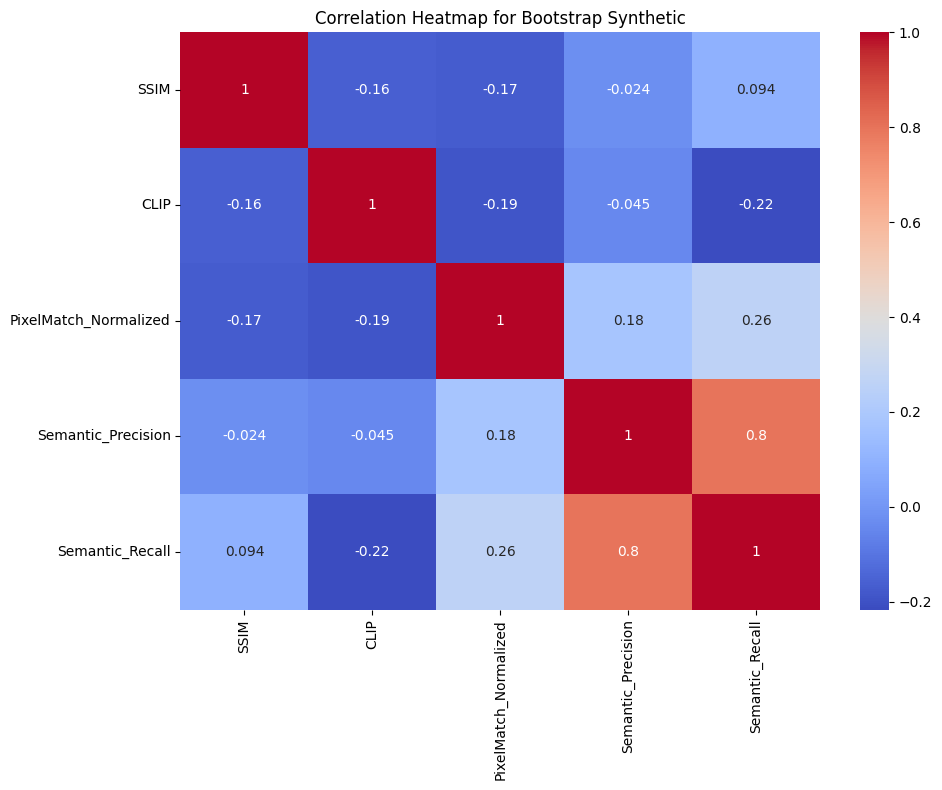

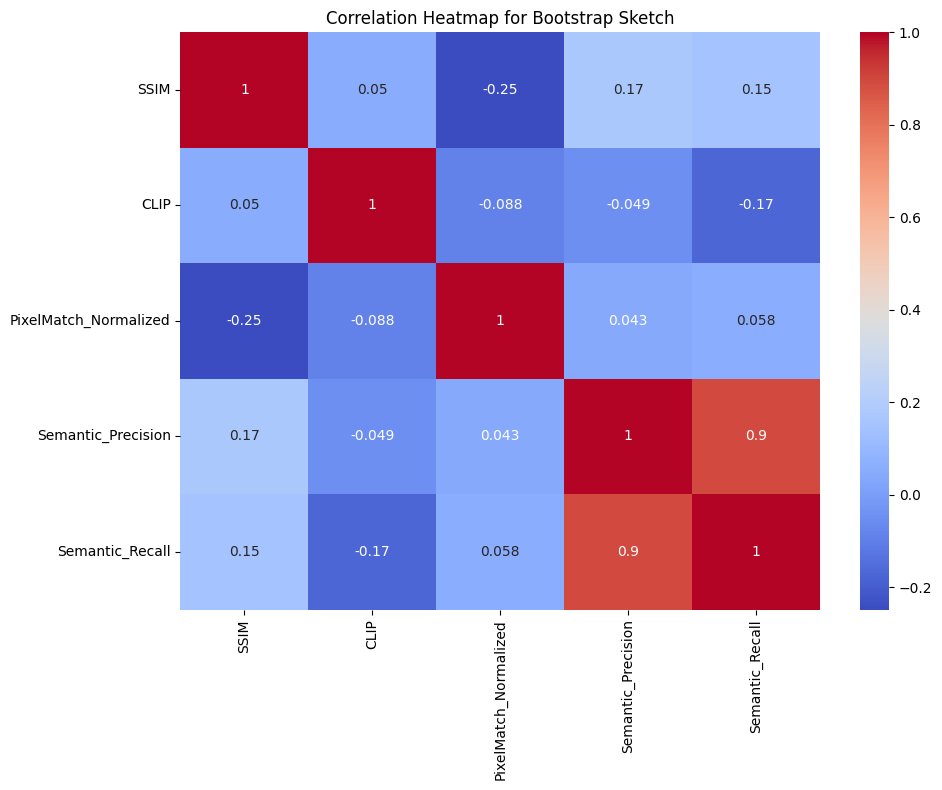

In [ ]:
# Function to categorize datasets
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'

# Apply dataset categorization
image_name_column = data.columns[0]  # Assuming the first column is the image/website name
data['Dataset'] = data[image_name_column].apply(categorize_dataset)

# Ensure PixelMatch_Normalized exists, if not, create it
if 'PixelMatch_Normalized' not in data.columns:
    scaler = MinMaxScaler()
    data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Define metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Perform one-way ANOVA for each metric
print("One-way ANOVA Results:")
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = stats.f_oneway(*groups)
    print(f"\n{metric}:")
    print(f"F-value: {f_value}")
    print(f"p-value: {p_value}")

# Boxplots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Violin plots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Distribution Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculate and print mean values for each metric across datasets
print("\nMean Values for Each Metric Across Datasets:")
print(data.groupby('Dataset')[metrics].mean())

# Heatmap of correlation matrices for each dataset
for dataset in data['Dataset'].unique():
    plt.figure(figsize=(10, 8))
    subset = data[data['Dataset'] == dataset]
    correlation_matrix = subset[metrics].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {dataset}')
    plt.tight_layout()
    plt.show()

Pairwise t-tests:

SSIM:
WebUI2Code vs Pix2Code:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Synthetic:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Sketch:
t-statistic: nan
p-value: nan
Pix2Code vs Bootstrap Synthetic:
t-statistic: 22.1155
p-value: 0.0000
Pix2Code vs Bootstrap Sketch:
t-statistic: 20.0132
p-value: 0.0000
Bootstrap Synthetic vs Bootstrap Sketch:
t-statistic: -1.2768
p-value: 0.2022

CLIP:
WebUI2Code vs Pix2Code:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Synthetic:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Sketch:
t-statistic: nan
p-value: nan
Pix2Code vs Bootstrap Synthetic:
t-statistic: 2.0820
p-value: 0.0379
Pix2Code vs Bootstrap Sketch:
t-statistic: 10.0038
p-value: 0.0000
Bootstrap Synthetic vs Bootstrap Sketch:
t-statistic: 5.4655
p-value: 0.0000

PixelMatch_Normalized:
WebUI2Code vs Pix2Code:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Synthetic:
t-statistic: nan
p-value: nan
WebUI2Code vs Bootstrap Sketch:
t-s

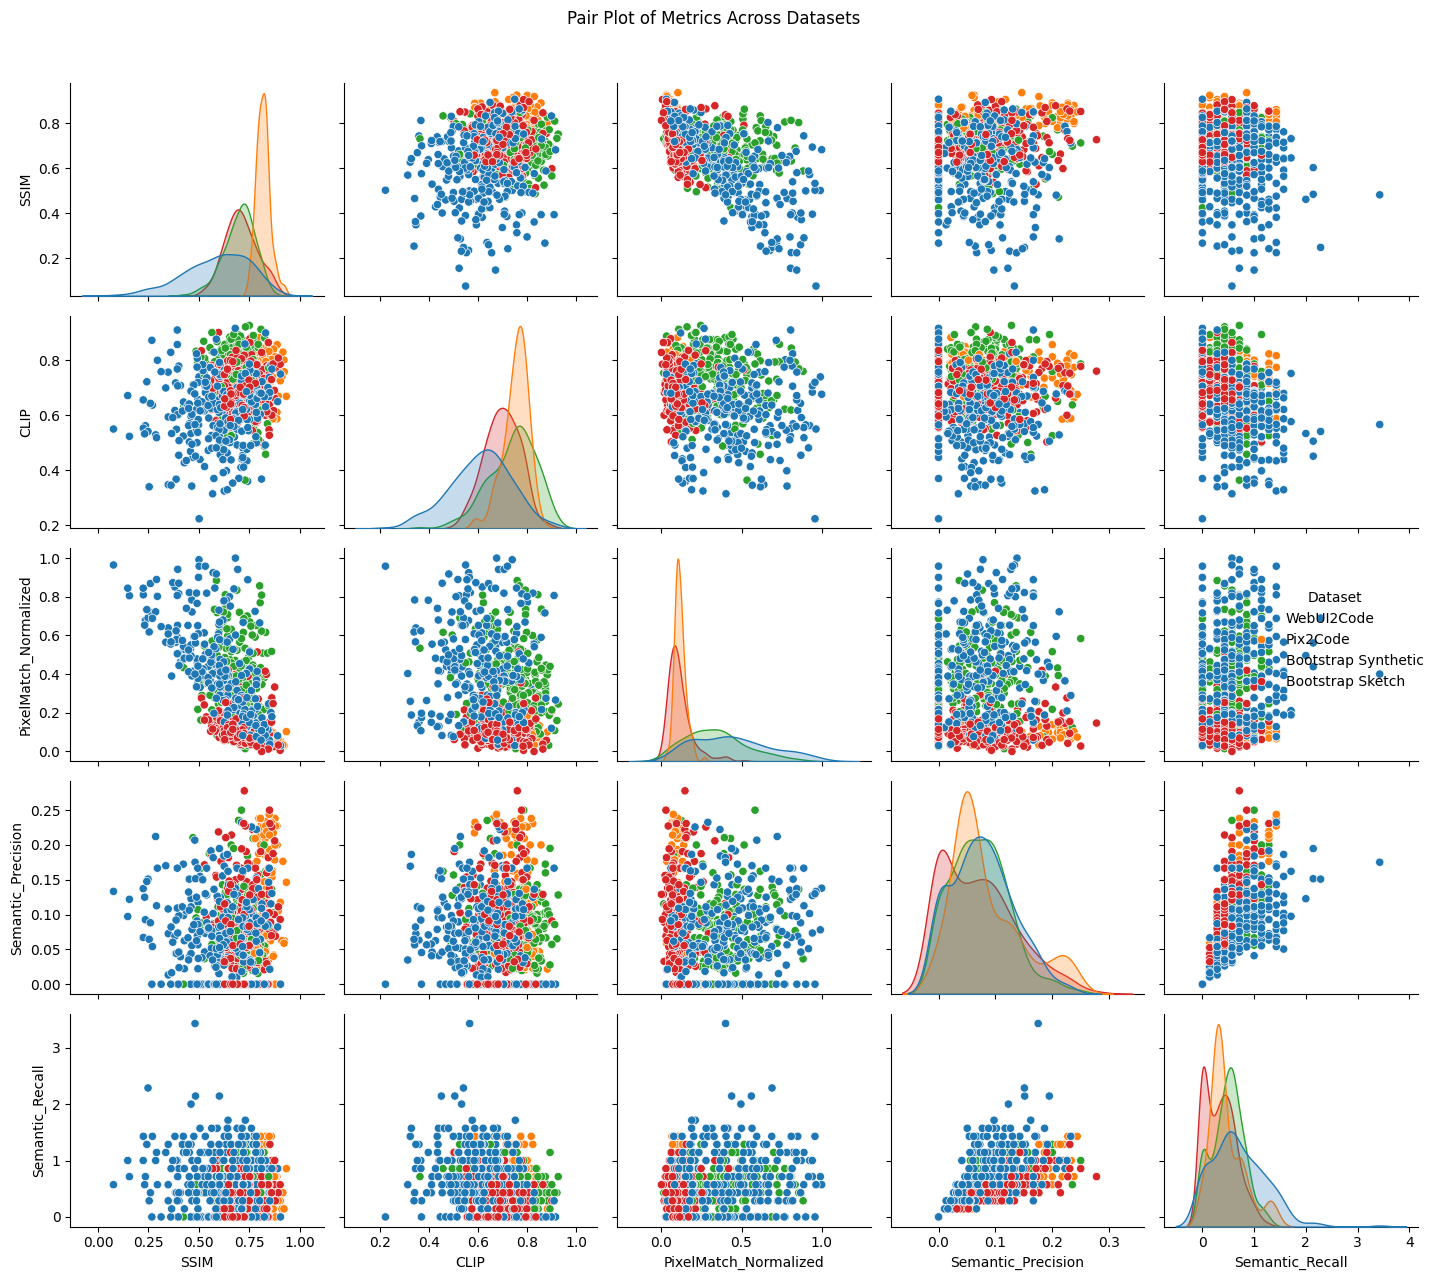

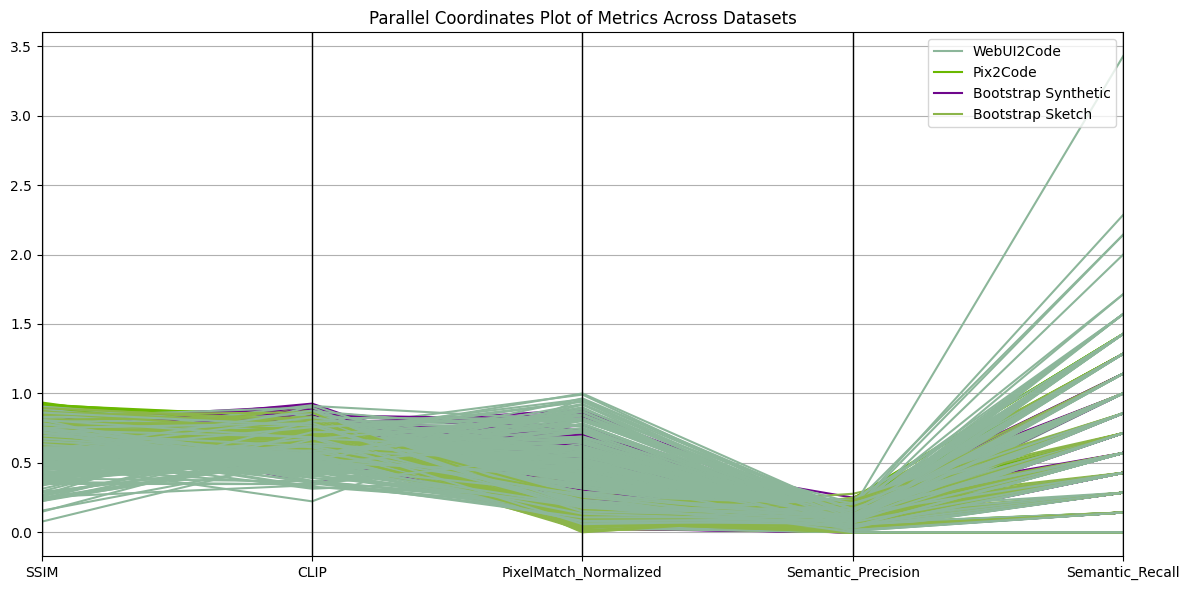

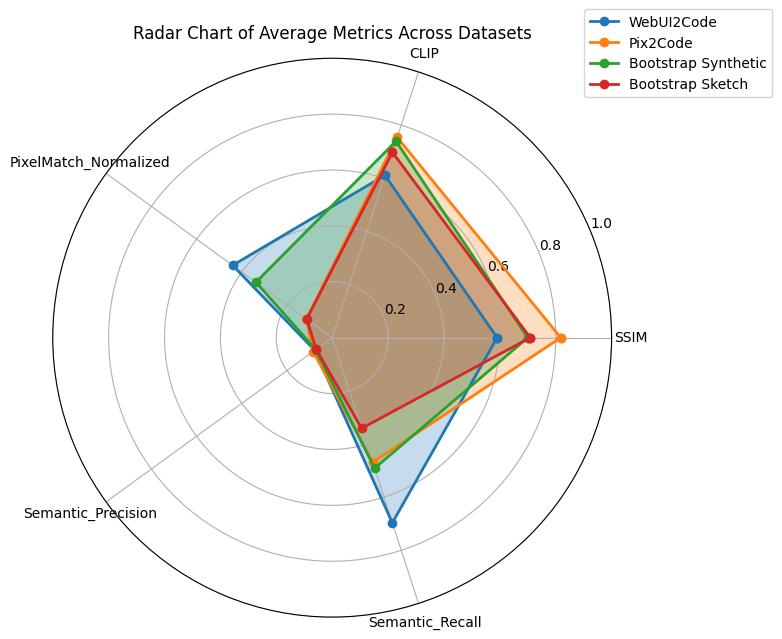


Statistical Summary:
                         SSIM                                    CLIP  \
                         mean       std       min       max      mean   
Dataset                                                                 
Bootstrap Sketch     0.708813  0.079363  0.513186  0.903837  0.697821   
Bootstrap Synthetic  0.699914  0.077209  0.424246  0.867899  0.739219   
Pix2Code             0.818048  0.034236  0.734916  0.934580  0.753634   
WebUI2Code           0.590342  0.159724  0.076783  0.905595  0.611105   

                                                  PixelMatch_Normalized  \
                          std       min       max                  mean   
Dataset                                                                   
Bootstrap Sketch     0.072023  0.502800  0.900760              0.112934   
Bootstrap Synthetic  0.096636  0.363583  0.926648              0.337489   
Pix2Code             0.051441  0.585617  0.882433              0.114483   
WebUI2Code      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations

# Assuming 'data' is already loaded and preprocessed from the previous cells

# Define metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Pairwise t-tests
print("Pairwise t-tests:")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"{dataset1} vs {dataset2}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

# Effect size (Cohen's d) for pairwise comparisons
print("\nEffect Size (Cohen's d):")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        d = (group1.mean() - group2.mean()) / ((group1.var() + group2.var()) / 2) ** 0.5
        print(f"{dataset1} vs {dataset2}: {d:.4f}")

# Visualizations
# Pair plot
sns.pairplot(data, hue='Dataset', vars=metrics)
plt.suptitle("Pair Plot of Metrics Across Datasets", y=1.02)
plt.tight_layout()
plt.show()

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Dataset', cols=metrics)
plt.title("Parallel Coordinates Plot of Metrics Across Datasets")
plt.tight_layout()
plt.show()

# Radar chart
def radar_chart(data, metrics, datasets):
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the polygon

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

    for dataset in datasets:
        values = data[data['Dataset'] == dataset][metrics].mean().values
        values = np.concatenate((values, [values[0]]))  # Close the polygon
        ax.plot(angles, values, 'o-', linewidth=2, label=dataset)
        ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180/np.pi, metrics)
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title("Radar Chart of Average Metrics Across Datasets")
    plt.tight_layout()
    plt.show()

radar_chart(data, metrics, data['Dataset'].unique())

# Statistical summary
print("\nStatistical Summary:")
summary = data.groupby('Dataset')[metrics].agg(['mean', 'std', 'min', 'max'])
print(summary)

# MANOVA (Multivariate Analysis of Variance)
from scipy.stats import f_oneway

print("\nMANOVA Results:")
f_values = []
p_values = []
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = f_oneway(*groups)
    f_values.append(f_value)
    p_values.append(p_value)

manova_results = pd.DataFrame({'Metric': metrics, 'F-value': f_values, 'p-value': p_values})
print(manova_results)

# Post-hoc analysis (if MANOVA is significant)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\nPost-hoc Analysis (Tukey's HSD):")
for metric in metrics:
    print(f"\n{metric}:")
    tukey = pairwise_tukeyhsd(data[metric], data['Dataset'])
    print(tukey)


<Figure size 1600x1000 with 0 Axes>

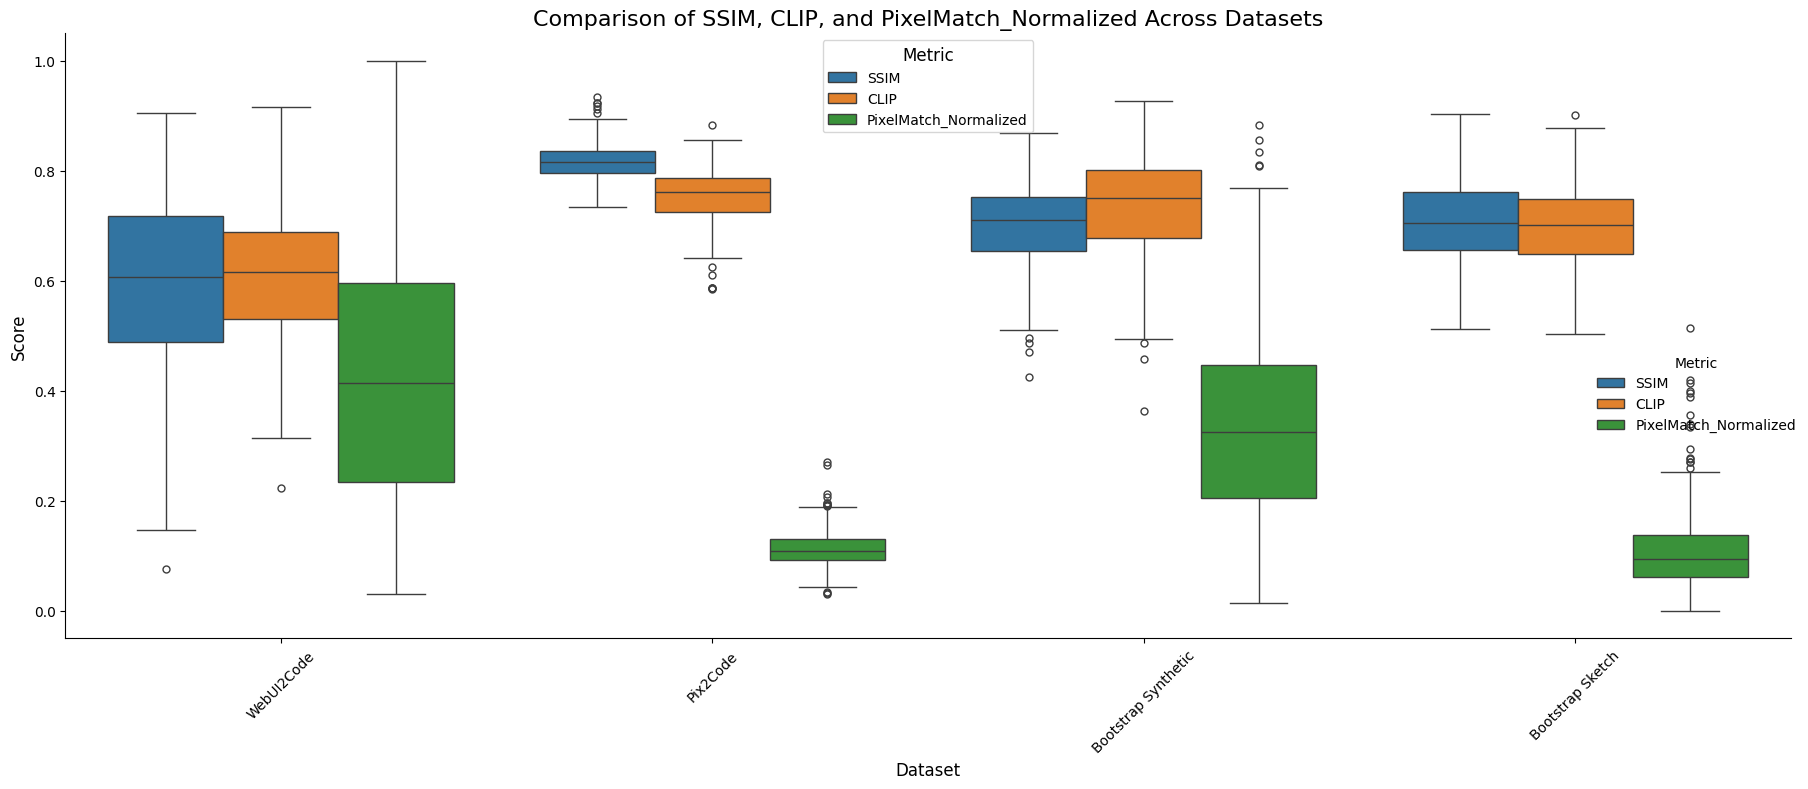


Summary Statistics:
                                             mean  median     std
Dataset             Metric                                       
Bootstrap Sketch    CLIP                   0.6978  0.7017  0.0720
                    PixelMatch_Normalized  0.1129  0.0949  0.0782
                    SSIM                   0.7088  0.7054  0.0794
Bootstrap Synthetic CLIP                   0.7392  0.7512  0.0966
                    PixelMatch_Normalized  0.3375  0.3252  0.1880
                    SSIM                   0.6999  0.7115  0.0772
Pix2Code            CLIP                   0.7536  0.7613  0.0514
                    PixelMatch_Normalized  0.1145  0.1093  0.0355
                    SSIM                   0.8180  0.8163  0.0342
WebUI2Code          CLIP                   0.6111  0.6168  0.1248
                    PixelMatch_Normalized  0.4404  0.4146  0.2380
                    SSIM                   0.5903  0.6075  0.1597


In [ ]:
# Melt the DataFrame to create a long format suitable for grouped box plots
melted_data = pd.melt(data,
                      id_vars=['Dataset'],
                      value_vars=['SSIM', 'CLIP', 'PixelMatch_Normalized'],
                      var_name='Metric',
                      value_name='Score')

# Create the combined plot
plt.figure(figsize=(16, 10))
sns.catplot(data=melted_data, x='Dataset', y='Score', hue='Metric', kind='box', height=8, aspect=2)

plt.title('Comparison of SSIM, CLIP, and PixelMatch_Normalized Across Datasets', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', title_fontsize='12', fontsize='10')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, calculate and print summary statistics
print("\nSummary Statistics:")
summary = melted_data.groupby(['Dataset', 'Metric'])['Score'].agg(['mean', 'median', 'std']).round(4)
print(summary)

# THE END

In [ ]:
# Function to calculate percentage above threshold
def percentage_above_threshold(series, threshold):
    return (series > threshold).mean() * 100

# Function to calculate percentage below threshold
def percentage_below_threshold(series, threshold):
    return (series < threshold).mean() * 100

# Calculate metrics
total_images = len(data)
ssim_above_085 = percentage_above_threshold(data['SSIM'], 0.85)
ssim_above_075 = percentage_above_threshold(data['SSIM'], 0.75)
ssim_above_065 = percentage_above_threshold(data['SSIM'], 0.65)
clip_above_085 = percentage_above_threshold(data['CLIP'], 0.85)
clip_above_075 = percentage_above_threshold(data['CLIP'], 0.75)
clip_above_065 = percentage_above_threshold(data['CLIP'], 0.65)
pixel_below_35 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 35)
pixel_below_25 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 25)
pixel_below_15 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 15)


# Create summary table
summary_data = {
    'Metric': [
        'SSIM > 0.85', 'SSIM > 0.75', 'SSIM > 0.65',
        'CLIP > 0.85', 'CLIP > 0.75', 'CLIP > 0.65',
        'PixelMatch Diff < 35%', 'PixelMatch Diff < 25%', 'PixelMatch Diff < 15%'
    ],
    'Threshold': [0.85, 0.75, 0.65, 0.85, 0.75, 0.65, 35, 25, 15],
    'Count': [
        int(ssim_above_085 * total_images / 100),
        int(ssim_above_075 * total_images / 100),
        int(ssim_above_065 * total_images / 100),
        int(clip_above_085 * total_images / 100),
        int(clip_above_075 * total_images / 100),
        int(clip_above_065 * total_images / 100),
        int(pixel_below_35 * total_images / 100),
        int(pixel_below_25 * total_images / 100),
        int(pixel_below_15 * total_images / 100)
    ],
    'Percentage': [
        f"{ssim_above_085:.2f}%",
        f"{ssim_above_075:.2f}%",
        f"{ssim_above_065:.2f}%",
        f"{clip_above_085:.2f}%",
        f"{clip_above_075:.2f}%",
        f"{clip_above_065:.2f}%",
        f"{pixel_below_35:.2f}%",
        f"{pixel_below_25:.2f}%",
        f"{pixel_below_15:.2f}%"
    ]
}

summary_data = pd.DataFrame(summary_data)

# Display the summary table
print(summary_data.to_string(index=False))
print(f"\nTotal images analyzed: {total_images}")

# Optional: Save the summary table as a CSV file
summary_data.to_csv('image_metrics_summary.csv', index=False)
print("\nSummary table saved as 'image_metrics_summary.csv'")

               Metric  Threshold  Count Percentage
          SSIM > 0.85       0.85     54      5.31%
          SSIM > 0.75       0.75    432     42.52%
          SSIM > 0.65       0.65    738     72.64%
          CLIP > 0.85       0.85     40      3.94%
          CLIP > 0.75       0.75    375     36.91%
          CLIP > 0.65       0.65    733     72.15%
PixelMatch Diff < 35%      35.00    717     70.67%
PixelMatch Diff < 25%      25.00    625     61.52%
PixelMatch Diff < 15%      15.00    381     37.50%

Total images analyzed: 1016

Summary table saved as 'image_metrics_summary.csv'
